# 1. 합성곱 신경망 이해

## 1.1 합성곱 연산

### 합성곱 연산

합성곱 구현

In [139]:
import numpy as np
x = np.array([2, 8, 3, 7, 1, 2, 0, 4, 5])
w = np.array([2, 1, 5, 3])

flip() 함수를 이용한 배열 뒤집기

In [140]:
w_r = np.flip(w)
print(w_r)

[3 5 1 2]


In [141]:
w_r = w[::-1]
print(w_r)

[3 5 1 2]


### 파이썬에서의 곱 ( list, array)

In [11]:
a = [1,2,3,4]
b = [2,2,2,2]

# print(type(a))
# print(type(b))

# c = a*b
c = a*2
print(c)

[1, 2, 3, 4, 1, 2, 3, 4]


In [16]:
a = np.array([1,2,3,4])
b = np.array([2,2,2,2])

print(type(a))
print(type(b))

c = a*b
print(c)
print( np.sum(c) )

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[2 4 6 8]
20


넘파이의 점 곱으로 합성곱 연산

In [24]:
N = len(x)
F = len(w_r)
NUM = N - F + 1
for i in range(NUM):
    print(np.sum(x[i:i+4]*w_r), end=" ")

63 48 49 28 21 20 

In [23]:
print(x.shape)
print(x[0:4].shape)
print(x[0:4])
print(w_r.shape)

(9,)
(4,)
[2 8 3 7]
(4,)


In [ ]:
print( type((4)) )
print( type((4,)) )

In [ ]:
a = np.array([1,2,3,4])
b = np.array([2,2,2])
c = a*b
# print(type(a))
# print(c)
# print( np.sum(c) )

In [25]:
a = np.array([1,2,3,4])
b = np.array([2,2,2])
c = np.dot(a,b)  # (4,)(3,)

ValueError: shapes (4,) and (3,) not aligned: 4 (dim 0) != 3 (dim 0)

In [28]:
a = np.array([1,2,3,4])
b = np.array([2,2,2,2])
c = np.dot(a,b)  # (4,)(4,) => ()
print(c)
print(c.shape)

20
()


In [29]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r), end=" ")

63 48 49 28 21 20 

In [33]:
print(w_r.shape)
print(w_r.T.shape)
print(w_r)
print(w_r.T)

(4,)
(4,)
[3 5 1 2]
[3 5 1 2]


In [38]:
a = np.array([1,2,3,4,5,6])
print(a)
# print(a.reshape(5,1))
print(a.reshape(-1,1))

[1 2 3 4 5 6]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [39]:
c = np.dot(x[0:4], w_r.reshape(-1,1))  # (4,)(4,1) => (1,)
print(c)

[63]


In [41]:
a = np.array([[1,2,3,4]])
b = np.array([2,2,2,2])
b = b.reshape(-1,1)
print(a.shape)
print(b.shape)
c = np.dot(a,b)  # (1,4)(4,1) => (1,1)
print(c)
# print(c.shape)

(1, 4)
(4, 1)
[[20]]


In [42]:
for i in range(6):
    print(np.dot(x[i:i+4], w_r.reshape(-1,1)), end = " ")  # (4,)(4,1) => (1,)

[63] [48] [49] [28] [21] [20] 

싸이파이로 합성곱 수행

In [43]:
from scipy.signal import convolve
convolve(x, w, mode='valid')

array([63, 48, 49, 28, 21, 20])

싸이파이로 교차상관 수행

In [44]:
from scipy.signal import correlate
correlate(x, w, mode='valid')

array([48, 57, 24, 25, 16, 39])

풀 패딩

In [45]:
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

세임 패딩

In [46]:
correlate(x, w, mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

2차원 배열에서 합성곱 수행 ( mode='valid' )

In [49]:
x = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
w = np.array([[2, 0], 
              [0, 0]])
print(x.shape)
print(w.shape)
from scipy.signal import correlate2d
out = correlate2d(x, w, mode='valid')
print(out)
print(out.shape)

(3, 3)
(2, 2)
[[ 2  4]
 [ 8 10]]
(2, 2)


2차원 배열에서 합성곱 수행 ( mode='same' )

In [50]:
correlate2d(x, w, mode='same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

1차원 배열

In [57]:
a = np.array( [1, 2] )

print(a.ndim)
print(a.shape) 
print(len(a))
print(a.shape[0])

1
(2,)
2
2


2 차원 배열

In [63]:
a = np.array( [ [1, 2], 
                [3, 4] ] )

print(a.shape)
print(len(a))
print(a.shape[0])
print(len(a[0]))
print(a[0].shape[0])
print(len(a[1]))
print(a[1].shape[0])

(2, 2)
2
2
2
2
2
2


3차원 배열

In [66]:
a = np.array( [[[1,2] , [3,4] ]  , [[5,6], [7,8]]  ] )
print(len(a))       # (2, 2, 2)
print(len(a[0]))    # (2, 2, 2)
print(len(a[1]))    # (2, 2, 2)
print(len(a[0][0])) # (2, 2, 2)


2
2
2
2


4차원 배열

In [69]:
a = np.array( [ [ [ [ 1 ] , [2] ], [[3],[4]] ], [[[5],[6]],[[7],[8]]]  ] )
print(a.shape)
print(len(a))            # (2, 2, 2, 1)
print(len(a[0]))         # (2, 2, 2, 1)
print(len(a[0][0]))      # (2, 2, 2, 1)
print(len(a[0][0][0]))   # (2, 2, 2, 1)


(2, 2, 2, 1)
2
2
2
1


In [70]:
a = np.array( [[[[1],[2],[3]],
                [[4],[5],[6]],
                [[7],[8],[9]]]] )

print(a.shape)   

(1, 3, 3, 1)


In [71]:
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape=", weight.shape)

weight.shape= (2, 2, 1, 1)


### 케라스의 Conv2D를 이용한 합성곱 연산

이미지 초기화(4차원 배열)

In [72]:
!pip install tensorflow

  Using cached grpcio-1.34.1-cp39-cp39-win_amd64.whl (2.9 MB)
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.44.0
    Uninstalling grpcio-1.44.0:
      Successfully uninstalled grpcio-1.44.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ovmsclient 2022.1 requires grpcio==1.44, but you have grpcio 1.34.1 which is incompatible.


In [73]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]], dtype=np.float32)
print(image)
print(image.numpy())
print(image.shape)

tf.Tensor(
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]], shape=(1, 3, 3, 1), dtype=float32)
[[[[1.]
   [2.]
   [3.]]

  [[4.]
   [5.]
   [6.]]

  [[7.]
   [8.]
   [9.]]]]
(1, 3, 3, 1)


이미지 시각화

In [74]:
print(image.numpy().reshape(3,3)) # (1,3,3,1) => (3,3)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


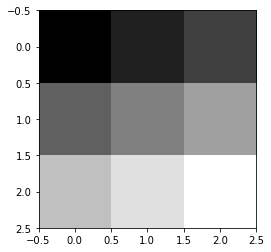

In [75]:
plt.imshow(image.numpy().reshape(3,3), cmap='gray')  #(1,3,3,1) => (3,3)
plt.show()

In [77]:
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print(weight.shape)
print(weight)
print(weight.reshape(2,2))

(2, 2, 1, 1)
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[1. 1.]
 [1. 1.]]


Conv2D를 이용한 합성곱(벨리드 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


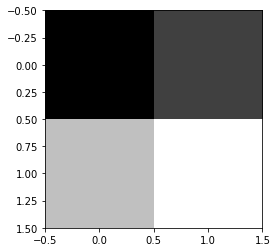

In [80]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(2,2))`
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

Conv2D를 이용한 합성곱(세임 패딩)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[11.999999 16.        9.      ]
 [24.       28.       15.      ]
 [14.999999 17.        8.999999]]


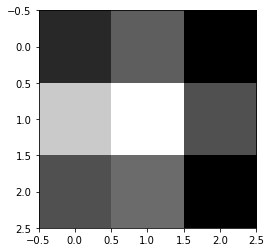

In [81]:
print("image.shape", image.shape)
weight = np.array([[[[1.]],[[1.]]],[[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

필터가 3개인 경우 합성곱 연산

In [84]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],[[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
print(weight)
temp = np.transpose(weight,(3,0,1,2))
for data in temp:
    print(data.reshape(2,2))

weight.shape (2, 2, 1, 3)
[[[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]


 [[[ 1. 10. -1.]]

  [[ 1. 10. -1.]]]]
[[1. 1.]
 [1. 1.]]
[[10. 10.]
 [10. 10.]]
[[-1. -1.]
 [-1. -1.]]


conv2d.shape (1, 2, 2, 3)
[[[[ 11.999999 120.       -11.999999]
   [ 16.       160.       -16.      ]]

  [[ 24.       240.       -24.      ]
   [ 28.       280.       -28.      ]]]]
[[11.999999 16.      ]
 [24.       28.      ]]
[[120. 160.]
 [240. 280.]]
[[-11.999999 -16.      ]
 [-24.       -28.      ]]


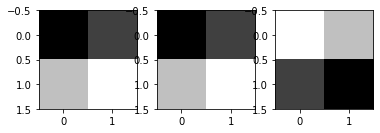

In [86]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape) # (1,2,2,3)
print(conv2d.numpy())
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(2,2))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(2,2), cmap='gray')
plt.show()

conv2d.shape (1, 3, 3, 3)
[[[[ 11.999999 120.       -11.999999]
   [ 16.       160.       -16.      ]
   [  9.        90.        -9.      ]]

  [[ 24.       240.       -24.      ]
   [ 28.       280.       -28.      ]
   [ 15.       150.       -15.      ]]

  [[ 14.999999 150.       -14.999999]
   [ 17.       170.       -17.      ]
   [  8.999999  89.99999   -8.999999]]]]
[[11.999999 16.        9.      ]
 [24.       28.       15.      ]
 [14.999999 17.        8.999999]]
[[120.      160.       90.     ]
 [240.      280.      150.     ]
 [150.      170.       89.99999]]
[[-11.999999 -16.        -9.      ]
 [-24.       -28.       -15.      ]
 [-14.999999 -17.        -8.999999]]


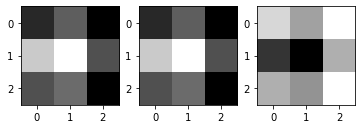

In [99]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape) # (1,2,2,3)
print(conv2d.numpy())
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

#### 축교환 예제

In [91]:
import numpy as np
a = np.arange(15).reshape(3,5)
print(a)
print(np.swapaxes(a, 0, 1))
print(a.T)
print(np.transpose(a, (1,0)))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [94]:
a = np.arange(24).reshape(2,3,4)
print(a)
print(np.swapaxes(a, 0, 2))
print(np.swapaxes(a, 0, 1))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
[[[ 0  1  2  3]
  [12 13 14 15]]

 [[ 4  5  6  7]
  [16 17 18 19]]

 [[ 8  9 10 11]
  [20 21 22 23]]]


In [95]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (2,3,0,1))
print(b)

[[[[ 0  4]
   [ 8 12]]

  [[ 1  5]
   [ 9 13]]]


 [[[ 2  6]
   [10 14]]

  [[ 3  7]
   [11 15]]]]


In [96]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (3,2,1,0))
print(b)

[[[[ 0  8]
   [ 4 12]]

  [[ 2 10]
   [ 6 14]]]


 [[[ 1  9]
   [ 5 13]]

  [[ 3 11]
   [ 7 15]]]]


In [97]:
a = np.arange(2*2*2*2).reshape(2,2,2,2)
b = np.transpose(a, (2,3,1,0))
print(b)

[[[[ 0  8]
   [ 4 12]]

  [[ 1  9]
   [ 5 13]]]


 [[[ 2 10]
   [ 6 14]]

  [[ 3 11]
   [ 7 15]]]]


이미지의 채널이 3개인 경우( weight도 채널이 3개임)

In [109]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt

image = tf.constant(  [[ 
                         [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                         [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                         [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                         [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                         [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                      ]],     dtype=np.float32)

# print(image)
maps = np.swapaxes(image, 0, 3)
for i, map in enumerate(maps):
    print(map.reshape(5,5))

[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [106]:
weight = np.array( [ 
                     [[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
                     [[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
                     [[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
                   ] )

maps = np.transpose(weight,(2,0,1,3))
for i, map in enumerate(maps):
    print(map.reshape(3,3))

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [107]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,3,3,1)
print(conv2d.numpy().reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


transpose를 이용한 시각화

In [111]:
# (3,3,3,2) => (3,2,3,3)
weight = np.array( [ 
                     [[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
                     [[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
                     [[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
                   ] )

maps = np.transpose(weight, (2,3,0,1) )

for map in maps:
    for filter in map:
        print(filter)

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


합성곱 연산( 필터 2개, 채널 3개, 벨리드 패딩 )

In [112]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)  # (1,3,3,2)
feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


### 풀링 연산

strides=1, padding='valid' 인 경우

In [113]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(image.shape)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4.]]]]


strides=1, padding='same' 인 경우

In [114]:
image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [118]:
temp = np.arange(16).reshape(1,4,4,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy().reshape(4,4))
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool.numpy().reshape(2,2))

(1, 4, 4, 1)
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
(1, 2, 2, 1)
[[ 5.  7.]
 [13. 15.]]


In [122]:
temp = np.arange(9).reshape(1,3,3,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy().reshape(3,3))
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(image)
print(pool.shape)
print(pool)

(1, 3, 3, 1)
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
(1, 1, 1, 1)
tf.Tensor([[[[4.]]]], shape=(1, 1, 1, 1), dtype=float32)


In [124]:
temp = np.arange(36).reshape(1,6,6,1)
image = tf.constant(temp, dtype=np.float32)
print(image.shape)
print(image.numpy().reshape(6,6))
pool = tf.keras.layers.MaxPool2D(pool_size=(3,3))(image)
print(pool.shape)
print(pool)

(1, 6, 6, 1)
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]]
(1, 2, 2, 1)
tf.Tensor(
[[[[14.]
   [17.]]

  [[32.]
   [35.]]]], shape=(1, 2, 2, 1), dtype=float32)


Loading MNIST Data

(60000, 28, 28)
(28, 28)
<class 'numpy.ndarray'>


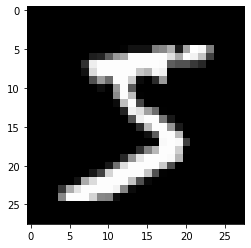

In [133]:
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9']

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

print( train_images.shape)  # (60000,28,28)
img = train_images[0]         
print(img.shape)            # (28,28)
print(type(img))
plt.imshow( img, cmap='gray')
plt.show()

합성곱 연산 시각화

conv2d.shape (1, 27, 27, 5)


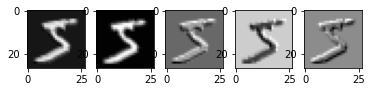

In [134]:
img = img.reshape(-1,28,28,1)   # (1,28,28,1)
img = tf.convert_to_tensor(img)

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)    
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=2, padding='valid', 
                              kernel_initializer=weight_init)(img)  # (3,3,1,5)
print("conv2d.shape", conv2d.shape)  # (1,27,27,5)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(27,27), cmap='gray')
plt.show()

conv2d.shape (1, 28, 28, 5)


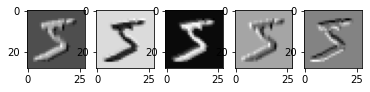

In [136]:
# img = img.reshape(-1,28,28,1)   # (1,28,28,1)
img = tf.convert_to_tensor(img)

weight_init = tf.keras.initializers.RandomNormal(stddev=0.01)    
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=2, padding='same', 
                              kernel_initializer=weight_init)(img)  # (2,2,1,5)
print("conv2d.shape", conv2d.shape)  # (1,28,28,5)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(28,28), cmap='gray')
plt.show()

맥스 풀링 연산 시각화

(1, 14, 14, 5)


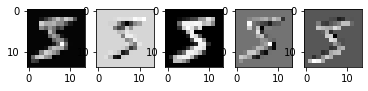

In [138]:
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2))(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

### 활성화 함수

시그모이드 함수

(200,)


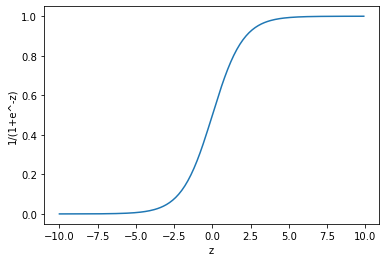

In [143]:
import numpy as np
zs = np.arange(-10., 10., 0.1)
print(zs.shape)
gs = [1/(1+np.exp(-z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

시그모이드 미분 그래프

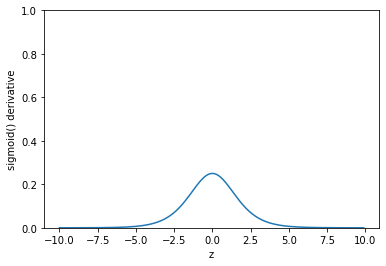

In [144]:
def  sigmoid(x):
    return 1/(1+np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [ sigmoid(z)*(1-sigmoid(z)) for z in zs]
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('sigmoid() derivative')
plt.show()

하이퍼 볼릭 탄젠트

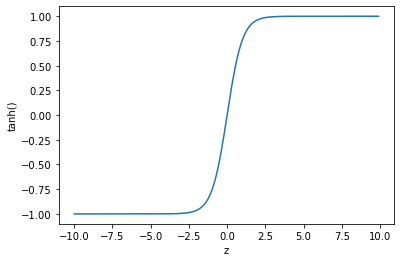

In [145]:
zs = np.arange(-10., 10., 0.1)
gs = [ np.tanh(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

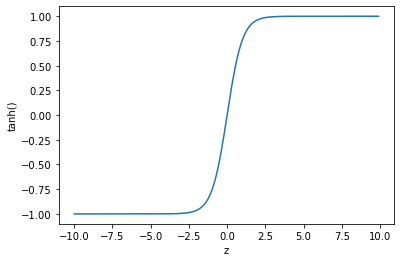

In [146]:
zs = np.arange(-10., 10., 0.1)
gs = [ 2*sigmoid(2*z)-1 for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh()')
plt.show()

하이퍼 볼릭 탄젠트 미분

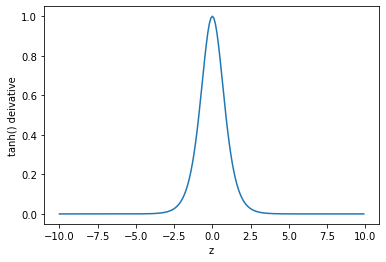

In [147]:
zs = np.arange(-10., 10., 0.1)
gs = [ 1-np.tanh(z)**2 for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

렐루 함수

In [ ]:
import numpy as np
def relu(x):
    return np.maximum(x, 0)

In [ ]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

In [ ]:
zs = np.arange(-10., 10., 0.1)
gs = [ relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

In [ ]:
r_out = tf.nn.relu(x)
r_out.numpy()

## 1.2 합성곱 신경망 구현

In [ ]:
def foo():
    a = np.arange(1000)
    print("foo()")
    return 10
    print("after")

a = None    
n = foo()
print(n)

In [ ]:
def foo():
    print("foo()")
    yield 10
    
c = foo() 
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

In [ ]:
def foo():
    a = np.arange(1000)
    print("foo()")
    yield 10
    print("after")

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)

In [ ]:
def foo():
    a = np.arange(3)  # [0,1,2]
    print("foo()")
    for i in range(3):
        yield a[i:i+1]

c = foo()
print(c)
n = next(c)
print(n)
n = next(c)
print(n)
n = next(c)
print(n)
n = next(c)
print(n)

In [ ]:
def foo():
    a = np.arange(3)  # [0,1,2]
    print("foo()")
    for i in range(3):
        yield a[i:i+1]

for n in foo():
    print(n)

In [ ]:
def foo():
    batch_size=10
    x = np.arange(100)
    bins = len(x) // batch_size                  

    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x[start:end] 

for n in foo():
    print(n)

In [ ]:
x = np.array([10,11,12,13,14,15,16,17,18,19])
indexes = np.random.permutation(len(x))
print(indexes)
print( x[indexes])  # x[[3 7 4 6 9 1 5 0 8 2]]

In [ ]:
x = np.array([1,2,3,4,5])
print(x[0:10])

In [ ]:
def foo(batch_size=10):
    
    x = np.arange(100,205)
    bins = len(x) // batch_size    
    if (len(x) % batch_size) != 0 :
        bins += 1
    indexes = np.random.permutation(len(x))
    x_temp = x[indexes]
    for i in range(bins):
        start = batch_size * i
        end = batch_size * (i + 1)
        yield x_temp[start:end]   

for n in foo(32):
    print(n)

In [ ]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)   # (128,28,28,1)
#         print('self.conv_w.shape',self.conv_w.shape)  # (3,3,1,10)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)  # (128,28,28,10)
#         print('c_out[0]=',c_out[0])
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)  # (128,28,28,10)
#         print('r_out[0]=',r_out[0])
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)  # (128,14,14,10)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)  # (128,1960)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
#         print('z1.shape',z1.shape)  # (128,1960)(1960,100) + (100,) = (128,100)
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
#         print('z2.shape',z2.shape)  # (128,100)(100,10) + (10,) = (128,10)
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
#                 break
            
#             break
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size        # 미니배치 횟수   
        indexes = np.random.permutation(len(x)) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)
        
#         print("loss=", loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

자동 미분의 사용 방법

In [ ]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

print(y)
# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

fashion mnist 로드

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train_all.shape)

훈련 데이터 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)
print(x_train.shape)

y_train 형상

In [ ]:
print(y_train[0])
print(y_train.shape)

결과값 원-핫 인코딩 

In [ ]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [ ]:
print(y_train_encoded[0])
print(y_train_encoded.shape)
print(x_train.shape)

그림 4차원 형상으로 변환

In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_val.shape)

입력 데이터 표준화 전처리하기

In [ ]:
x_train = x_train / 255
x_val = x_val / 255

모델 훈련하기

In [ ]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

훈련, 검증 손실 그래프 그리고 검증 세트의 정확도 확인

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

정확도

In [ ]:
cn.score(x_val, y_val_encoded)

### 1.3 케라스로 합성곱 신경망 구현

필요한 클래스들을 임포트하기

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

합성곱층 쌓기

In [ ]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1))) # w:(3,3,1,10),b:(10,)

풀링층 쌓기

In [ ]:
conv1.add(MaxPooling2D((2, 2)))

완전 연결층에 주입할 수 있도록 특성 맵 펼치기

In [ ]:
conv1.add(Flatten())

완전 연결층 쌓기

In [ ]:
conv1.add(Dense(100, activation='relu'))    # (128,1960)(1960,100)+(100,)
conv1.add(Dense(10, activation='softmax'))  # (128,100)(100,10)+(10,)

모델 구조 살펴보기

In [ ]:
conv1.summary()

모델 컴파일

In [ ]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

모델 훈련

In [ ]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

손실 그래프와 정확도 그래프

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

### 드롭아웃 적용해 합성곱 신경망 구현

케라스로 만든 합성곱 신경망에 드롭아웃 적용하기

In [ ]:
from tensorflow.keras.layers import Dropout

conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

드롭아웃층 확인하기

In [ ]:
conv2.summary()

훈련하기

In [ ]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

손실 그래프와 정확도 그래프 그리기

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
a = np.array([1,2,3,4])
print(a)
b = tf.constant(a)
print(b)
print(b.numpy())

In [ ]:
a = np.array([1,2,3,4])
print(a)
b = tf.convert_to_tensor(a)
print(b)